# Assignment 9: Clustering

In this assignment, you will be working with some age (measured in years) and height (measured in fractional feet.  So, for instance, 5 feet 6 inches would be 5.5 since there are 12 inches in a foot).  The data is admittedly made up, but I chose these interpretations to demonstrate something very important about clustering.  

In the data, there is a feature called `true_cluster`.  Usually, this column would never be available to you (after all, clustering is a form of unsupervised learning). Do not, I repeat, do not use this column in your clustering.  This column has been included for the sole purpose of comparing clustering methods to ground truth.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import seaborn as sns
%matplotlib inline

## Part A (1 Mark)

Load the `age_height_data.csv` data into a pandas dataframe.  Plot a scatterplot of the two variables and colour the dots according to their `true_cluster_label` value for reference.  

In [3]:
df = pd.read_csv('age_height_data.csv')

df.head()

,age,height,true_cluster_label
0,37.0,4.961920,0
1,50.0,5.821349,2
2,45.0,5.531872,1
3,39.0,5.116280,0
4,68.0,5.168562,3


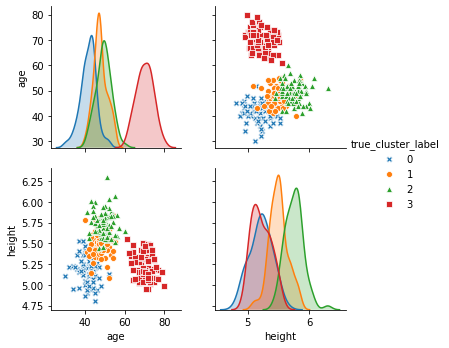

In [4]:
sns.pairplot(df, vars=["age", "height"], hue='true_cluster_label', 
             markers=['X','o','^','s'])

## Part B (1 Mark)

There are 4 true clusters in the data.  Create a K-means pipeline using sklearn's `KMeans` with `n_clusters=4`.  Predict on the data and plot the data according to the predicted cluster label.

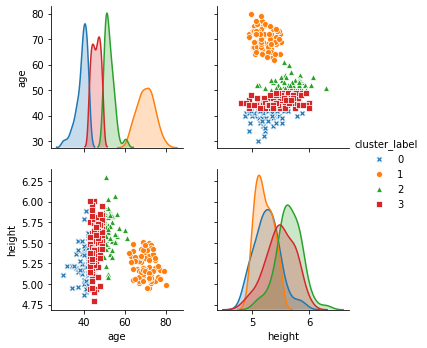

In [5]:
X = df.drop('true_cluster_label', axis=1).astype('float').values
y = df.true_cluster_label.values

cl_pipe = Pipeline([
    ('aggcl',KMeans(n_clusters=4))
])

df['cluster_label'] = cl_pipe.fit_predict(X)

sns.pairplot(df, vars=["age", "height"], hue='cluster_label', 
             markers=['X','o','^','s'])

## Part C (1 Mark)

You should see that the left most blob is clustered in a way that the decision line between two clusters is nearly vertical.  Does this look like the true cluster labels?  If not, what might explain this?  **Hint**: How is age measured?  How is height measured?  Are they comparable scales?

Write your answer below.

From the plot above. We found that the cluster is not look like the true cluster labels. The labels is more look like vertical.  the issue is actually that age has a much larger range than height, so age dominates the Euclidean distance used by the algorithm to form the clusters.

## Part D (1 Mark)

Add a `StandardScaler` to your pipeline and create the plot again.  Comment on if the scaling helped the clustering in so far as the predicted clusters look more like the true clusters.

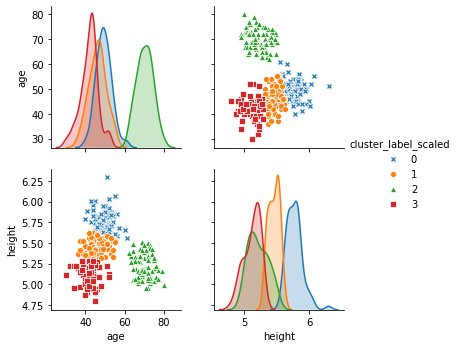

In [6]:
cl_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('aggcl',KMeans(n_clusters=4))
])

df['cluster_label_scaled'] = cl_pipe.fit_predict(X)

sns.pairplot(df, vars=["age", "height"], 
             hue='cluster_label_scaled', 
             markers=['X','o','^','s'])
# the scaling did help the clustering.

## Part E (1 Mark)

In applied clustering, we never know how many clusters exist in the data.  That is something we have to decide.  One method used to determine the number of clusters is to use an elbow plot.

An elbow plot is made by fitting the clustering algorithm for a variety of cluster sizes (usually between 2 and $\sqrt{N}$ clusters, where $N$ is the number of rows in the data.  Each time we fit the clustering algorithm with a different number of clusters, we record the value of the objective function for the algorithm (in sklearn's `KMeans`, this can be done by calling `Kmeans.score`).  The number of clusters is determined by looking for an "elbow" in the data; a point where the algorithm's objective function stops decreasing quickly with additional numbers of clusters.

Create an elbow plot for this data.

Text(0.5, 1.0, 'Elbow curve')

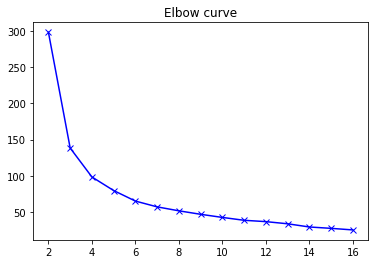

In [8]:
KScores = []
K = range(2,int(np.sqrt(len(df.index))))
for k in K:
    #since the score is the opposite of the value of X on the K-means objective.
    cl_pipe.named_steps['aggcl'].set_params(n_clusters = k)
    cl_pipe.fit(X)
    score = abs(cl_pipe.fit(X).score(X))
    KScores.append(score)

plt.plot(K, KScores, 'bx-')
plt.title('Elbow curve')

## Part F (1 Mark)

Where is the "elbow" for this data?  Justify your answer.  Pretend as if you didn't know there were really 4 clusters in the data.

From the plot above, we can find that when k = 5, adding the cluster doesn't help a lot. 


## Part G (4 Marks)

Read the accompanying paper entitled **Clustering - What Both Theoreticians and Practitioners are Doing Wrong**, then answer the following short answer questions.  Write your answers in the space provided.


1)  Why does the author think the two requirements of clustering conflict with one another?
    
    
2) Summarize the author's criticisms of the theoretician's approach to clustering.

3) Summarize the author's criticisms of the practitioner's approach to clustering.

4) As a practitioner, how might you go about thinking about which algorithm to use for clustering from now on?

    1) First requirement is similar elements share the same cluster. Seconde requirement is the members of each cluster are all similar. He mentioned an example that a long line data points, which is close by each other. If we want to prove the first requirement, then those points will share the same cluster. But it against the second requirement that all the points in this cluster are not all similar.
    2)For the theoretician's approach, author mentioned that they only focus on the runtime and effecient, the evaluation on how close to the minimum possible is also the cost.
    3)For the practitioner's approach, author mentioned a lot of practitionares choose the algorithm without thinking. their reason is also superficial.
    4)Trying to find the properties of the clustering algorithms I 'm using and then pick the suitable one. choose a semi-supervision model that has ontgoing interaction between the user and the algorithm